In [20]:
library(Synth)
library(LowRankQP)
library(conflicted)
library(dplyr)
library(rvest)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(googlesheets4)
library(skimr)
library(kableExtra)
library(ggthemes)
library(stargazer)
library(kableExtra)

In [23]:
link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vR0tsI32rJCxe8DYUi5G1m7ADENzPr1Y--7nAf3ycoWPS_6Zz_Fad2qYBEEazIjb5FXEO77KNxJ1vDr/pub?gid=0&single=true&output=csv"
data <- read.csv(link, header=TRUE)
head(data)

,year,country,country_num,fertility_rate,gdp_per_capita,log_gdp,marriages_per_thousand,female_participation,urban_population,age_young,age_old,non_religous
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,France,0,1.77,27992.98,10.23971,4.67,57.864,74.056,30.56794,21.22484,0.16835
2,1991,France,0,1.75,28197.24,10.24698,4.67,58.110,74.229,30.55329,21.61846,0.16835
3,1992,France,0,1.74,28482.52,10.25705,4.67,58.812,74.401,30.49691,21.99131,0.16835
4,1993,France,0,1.73,28257.10,10.24910,4.67,59.516,74.572,30.34065,22.34693,0.16835
5,1994,France,0,1.73,28822.50,10.26891,4.40,59.917,74.743,30.13301,22.71598,0.16835
6,1995,France,0,1.74,29379.62,10.28806,4.40,60.501,74.912,29.86362,23.09854,0.16835


In [56]:
# Define the treated unit, donor pool, and treated year
treated_unit <- "France"

donor_pool <- unique(data$country[data$country != treated_unit])

treated_year <- 1999

dataprep_out <- dataprep(
  foo = data,
  predictors = c("log_gdp", "marriages_per_thousand", "female_participation", "urban_population", "age_young", "age_old", "non_religous"),  # Review and adjust the predictors
  dependent = "fertility_rate",  # Verify that the outcome variable is correctly specified
  unit.variable = "country_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  predictors.op = "mean",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 1990:1999,  # Adjust the time range for the placebo test
  time.optimize.ssr = 1990:1999,  # Adjust the time range for the placebo test
  unit.names.variable = "country",
  time.plot = 1990:2010,  # Adjust the time range for the placebo test
)

synth_out <- synth(dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.005637154 

solution.v:
 0.6950268 0.2513751 0.02820011 4.25049e-05 0.02248713 0.0001242997 0.002744092 

solution.w:
 0.1531682 0.0003718679 0.1517 0.0001746809 0.0002154736 0.0002315567 1.18094e-05 0.6837471 0.009634831 3.92858e-05 0.0007052157 



In [42]:
print(synth_out)


$solution.v
       log_gdp marriages_per_thousand female_participation urban_population
BFGS 0.6950268              0.2513751           0.02820011     4.250485e-05
      age_young      age_old non_religous
BFGS 0.02248713 0.0001242997  0.002744092

$solution.w
       w.weight
1  1.531682e-01
2  3.718679e-04
3  1.517000e-01
4  1.746809e-04
5  2.154736e-04
6  2.315567e-04
7  1.180936e-05
8  6.837471e-01
9  9.634831e-03
10 3.928577e-05
11 7.052157e-04

$loss.v
            0
0 0.005637154

$loss.w
           w.weight
w.weight 0.04687052

$custom.v
NULL

$rgV.optim
$rgV.optim$out.list
                      p1           p2           p3            p4            p5
BFGS            65.10832     23.54817 2.641714e+00 -3.981745e-03     -2.106537
Nelder-Mead 488712.57901 451675.31127 2.217263e+05 -6.934251e+02 421539.331478
                       p6           p7       value fevals gevals niter convcode
BFGS         1.164408e-02 2.570595e-01 0.005637154    153    100    NA        1
Nelder-Mead -1.2

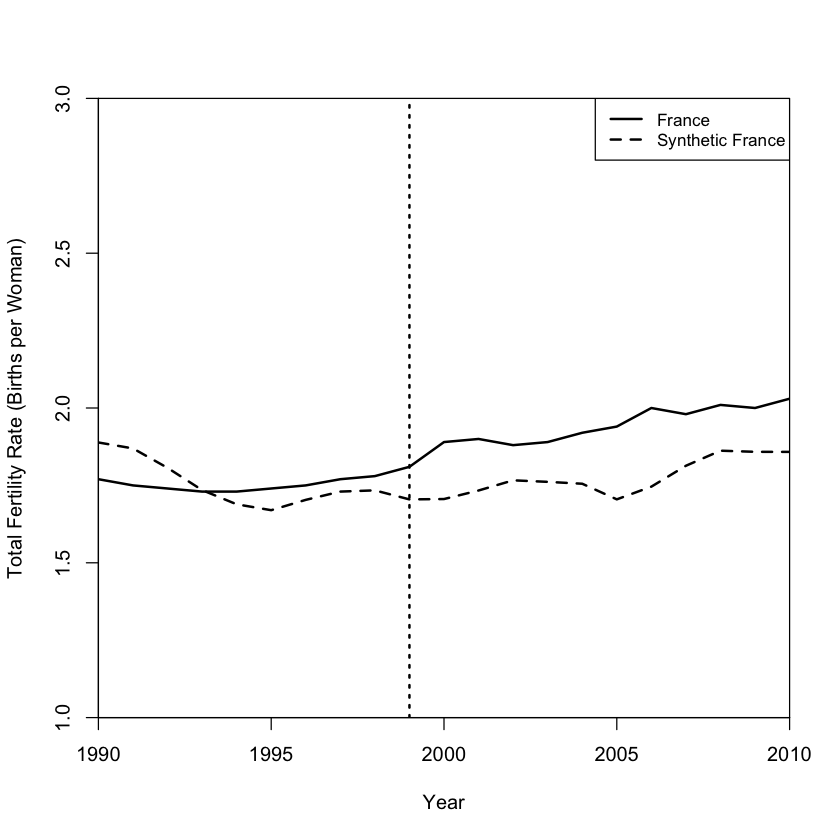

In [ ]:
path.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 1999,
          Ylab = "Total Fertility Rate (Births per Woman)",
          Xlab = "Year",
          Legend = c("France", "Synthetic France"),
        #   Main = "Figure 1: France vs. Synthetic France",
          Ylim = c(1,3)
        )


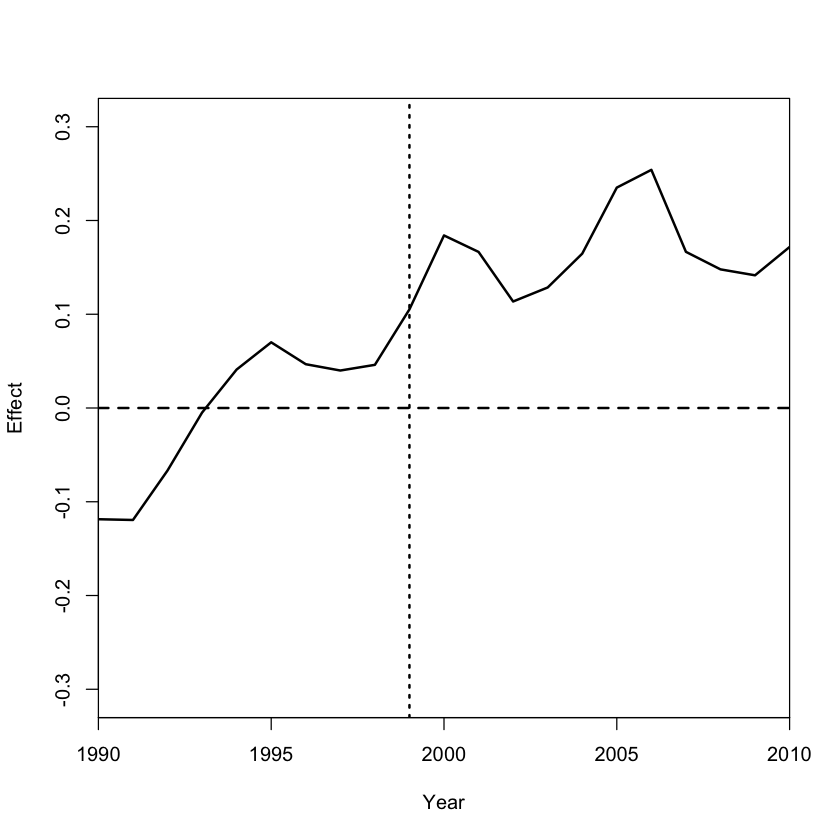

In [44]:
 gaps.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 1999,
          Ylab = "Effect",
          Xlab = "Year",
          Main = c("")
        #   Main = "Figure 2: Gap between fertilities in France vs. Synthetic France""
        )


In [51]:
# Define the treated unit, donor pool, and treated year
treated_unit <- "France"

donor_pool <- unique(data$country[data$country != treated_unit])

treated_year <- 1996

dataprep_out_placebo <- dataprep(
  foo = data,
  predictors = c("log_gdp", "marriages_per_thousand", "female_participation", "urban_population", "age_young", "age_old", "non_religous"),  # Review and adjust the predictors
  dependent = "fertility_rate",  # Verify that the outcome variable is correctly specified
  unit.variable = "country_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  predictors.op = "mean",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 1990:1996,  # Adjust the time range for the placebo test
  time.optimize.ssr = 1990:1996,  # Adjust the time range for the placebo test
  unit.names.variable = "country",
  time.plot = 1990:2010,  # Adjust the time range for the placebo test
)

synth_out_placebo <- synth(dataprep_out_placebo)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.00342822 

solution.v:
 0.8865456 0.06216686 0.03369749 7.0196e-06 1.173e-05 0.01750476 6.65024e-05 

solution.w:
 0.0001010525 0.0001108492 0.444023 0.000153884 0.0001710269 0.0001187858 2.52977e-05 0.5518504 0.003184721 4.17516e-05 0.0002192529 



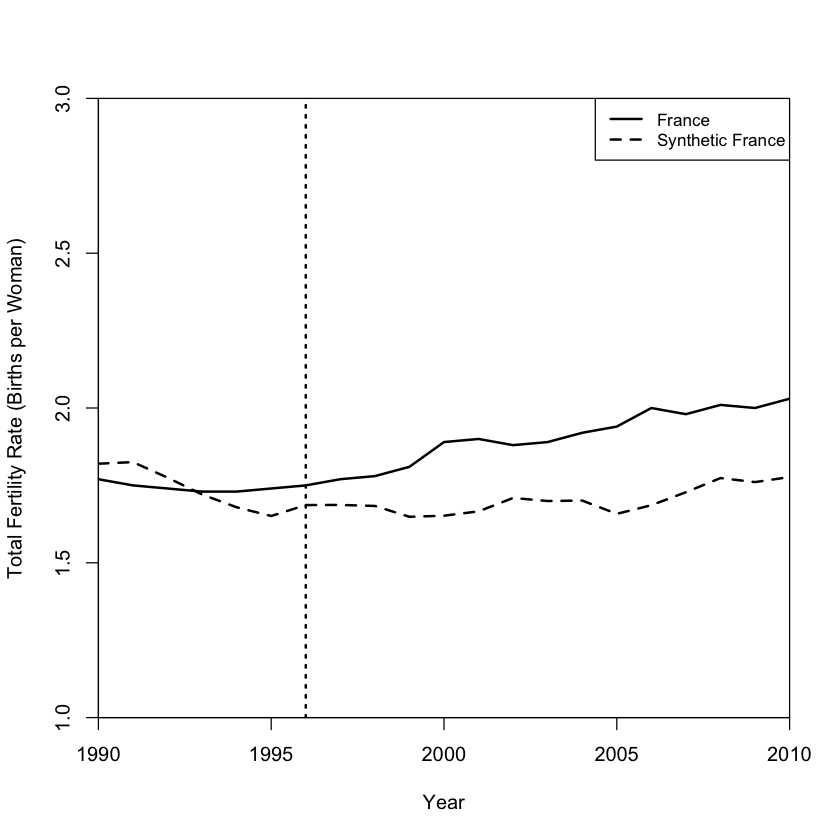

In [52]:
path.plot(synth.res = synth_out_placebo,
          dataprep.res = dataprep_out_placebo,
          tr.intake = 1996,
          Ylab = "Total Fertility Rate (Births per Woman)",
          Xlab = "Year",
          Legend = c("France", "Synthetic France"),
        #   Main = "Figure 1: France vs. Synthetic France",
          Ylim = c(1,3)
        )


In [47]:
# Define the treated unit, donor pool, and treated year
treated_unit <- "France"

donor_pool <- unique(data$country[data$country != treated_unit])

treated_year <- 1993

dataprep_out_placebo_1993 <- dataprep(
  foo = data,
  predictors = c("log_gdp", "marriages_per_thousand", "female_participation", "urban_population", "age_young", "age_old", "non_religous"),  # Review and adjust the predictors
  dependent = "fertility_rate",  # Verify that the outcome variable is correctly specified
  unit.variable = "country_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  predictors.op = "mean",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 1990:1993,  # Adjust the time range for the placebo test
  time.optimize.ssr = 1990:1993,  # Adjust the time range for the placebo test
  unit.names.variable = "country",
  time.plot = 1990:2010,  # Adjust the time range for the placebo test
)

synth_out_placebo_1993 <- synth(dataprep_out_placebo)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.00342822 

solution.v:
 0.8865456 0.06216686 0.03369749 7.0196e-06 1.173e-05 0.01750476 6.65024e-05 

solution.w:
 0.0001010525 0.0001108492 0.444023 0.000153884 0.0001710269 0.0001187858 2.52977e-05 0.5518504 0.003184721 4.17516e-05 0.0002192529 



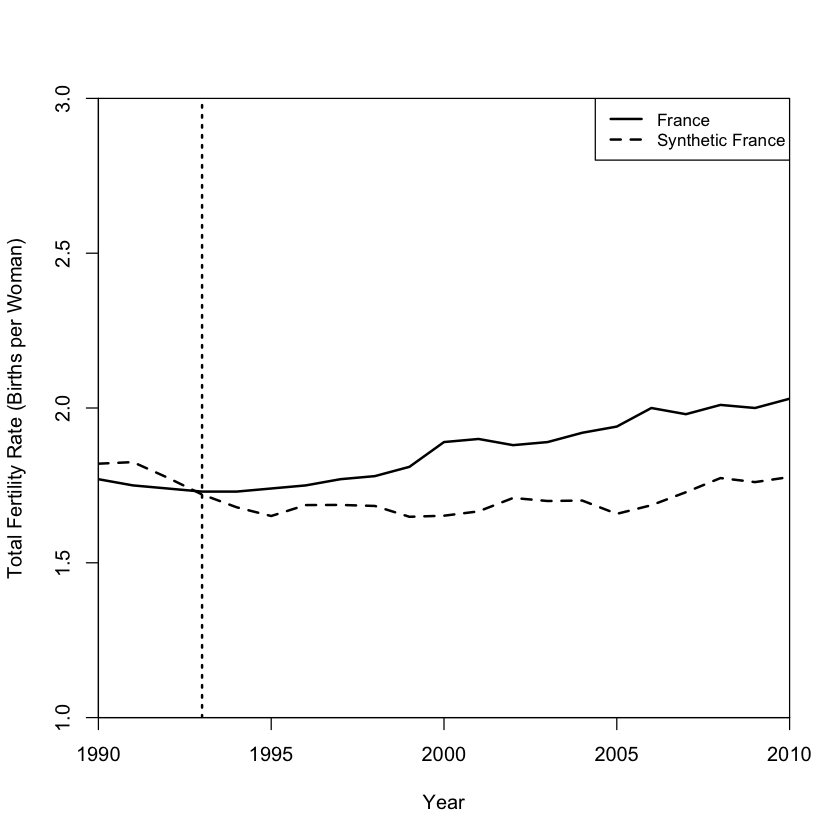

In [48]:
path.plot(synth.res = synth_out_placebo_1993,
          dataprep.res = dataprep_out_placebo_1993,
          tr.intake = 1993,
          Ylab = "Total Fertility Rate (Births per Woman)",
          Xlab = "Year",
          Legend = c("France", "Synthetic France"),
        #   Main = "Figure 1: France vs. Synthetic France",
          Ylim = c(1,3)
        )

In [73]:
gaps <- dataprep_out$Y1plot - (dataprep_out$Y0plot %*% synth_out$solution.w)

donor_weights <- synth_out$solution.w
donor_names <- donor_pool

# Create a data frame with weights, names, and spacing
donor_data <- data.frame(Weights = donor_weights, Countries = donor_names)

# Use stargazer to display the data frame
library(stargazer)
stargazer(donor_data, type = "text", summary = FALSE)



   w.weight Countries
---------------------
1   0.153     Italy  
2   0.0004    Spain  
3   0.152    Austria 
4   0.0002   Greece  
5   0.0002   Poland  
6   0.0002  Slovakia 
7  0.00001   Romania 
8   0.684    Ireland 
9   0.010   Bulgaria 
10 0.00004  Lithuania
11  0.001    Latvia  
---------------------


In [74]:
synth_tables <- synth.tab(dataprep.res = dataprep_out, synth.res = synth_out)

synth_tables[1:3]


$tab.pred
                       Treated Synthetic Sample Mean
log_gdp                 10.290    10.270       9.286
marriages_per_thousand   4.668     4.844       5.585
female_participation    60.018    53.935      55.532
urban_population        74.828    59.948      64.521
age_young               29.902    33.884      29.930
age_old                 22.871    19.518      20.055
non_religous             0.168     0.052       0.108

$tab.v
                       v.weights
log_gdp                0.695    
marriages_per_thousand 0.251    
female_participation   0.028    
urban_population       0        
age_young              0.022    
age_old                0        
non_religous           0.003    

$tab.w
   w.weights unit.names unit.numbers
1      0.153      Italy            1
2      0.000      Spain            2
3      0.152    Austria            3
4      0.000     Greece            4
5      0.000     Poland            5
6      0.000   Slovakia            6
7      0.000    Romania            7
8      0.684    Ireland            8
9      0.010   Bulgaria            9
10     0.000  Lithuania           10
11     0.001     Latvia           11

In [138]:
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

# Install SCtools package from GitHub
remotes::install_github("bcastanho/SCtools")


Using GitHub PAT from the git credential store.



Skipping install of 'SCtools' from a github remote, the SHA1 (64cdd39a) has not changed since last install.
  Use `force = TRUE` to force installation



In [57]:
library(SCtools)

Loading required package: future



In [58]:
placebo <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 2, strategy='multicore')


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.001760051 

solution.v:
 0.3280185 0.0001720837 0.2794806 2.0546e-05 0.3172132 0.07436793 0.0007270777 

solution.w:
 0.7646242 0.082975 0.1185994 0.000927932 0.0002766458 0.009643405 0.003651997 0.01433113 0.0002983142 0.004666908 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.008010611 

solution.v:
 0.005210234 0.02803685 0.3642355 0.07778284 0.5235318 0.00118733 1.54061e-05 

solution.w:
 0.2707143 0.0199496 0.6253667 0.007019312 0.001177536 0.009467703 0.004174732 0.03528074 0.006882459 0.01996607 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
****************

New names:
* `w.weight` -> `w.weight...1`
* `w.weight` -> `w.weight...2`
* `w.weight` -> `w.weight...3`
* `w.weight` -> `w.weight...4`
* `w.weight` -> `w.weight...5`
* `w.weight` -> `w.weight...6`
* `w.weight` -> `w.weight...7`
* `w.weight` -> `w.weight...8`
* `w.weight` -> `w.weight...9`
* `w.weight` -> `w.weight...10`
* `w.weight` -> `w.weight...11`


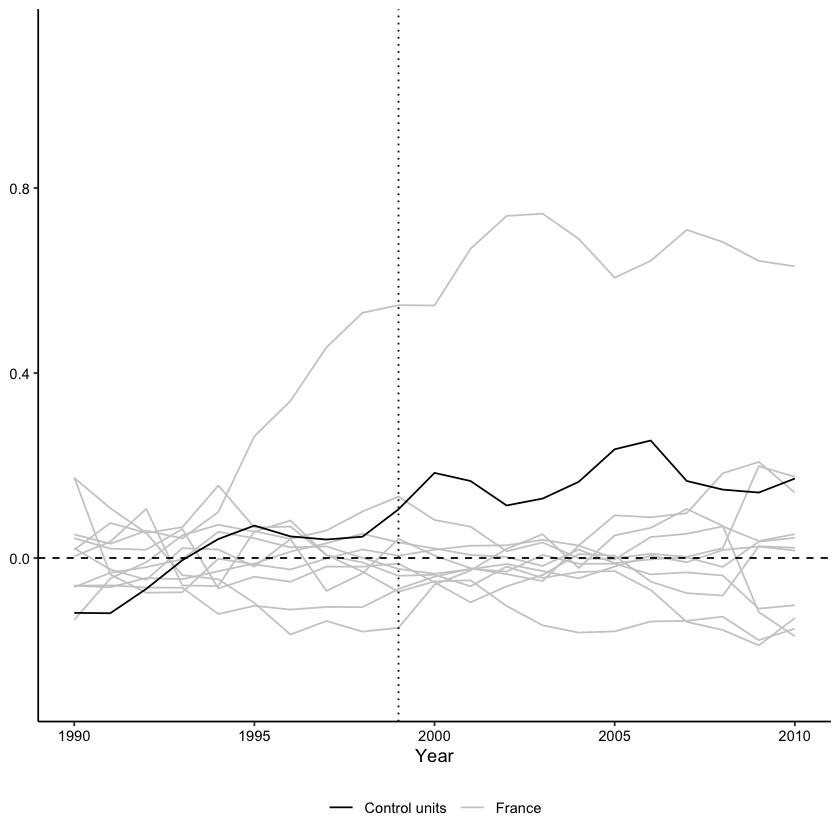

In [72]:
p <- plot_placebos(placebo, discard.extreme=TRUE, mspe.limit=20, xlab='Year')
p

In [70]:
# Calculate the p-value
ratio <- mspe.test(placebo)
print(ratio$p.val)


[1] 0.08333333


In [64]:
print(ratio$test)

   MSPE.ratios      unit
1    0.2459282     Italy
2    0.3344309     Spain
3    2.5561361   Austria
4    0.4698401    Greece
5    3.3570647    Poland
6    1.9023987  Slovakia
7    2.6205641   Romania
8    4.4814900   Ireland
9    4.9265294  Bulgaria
10   0.4239770 Lithuania
11   0.4347682    Latvia
12   5.4357145    France


Warning message in mspe.plot(placebo, discard.extreme = FALSE, mspe.limit = 100, :
"discard.extreme is FALSE. mspe.limit will be ignored."


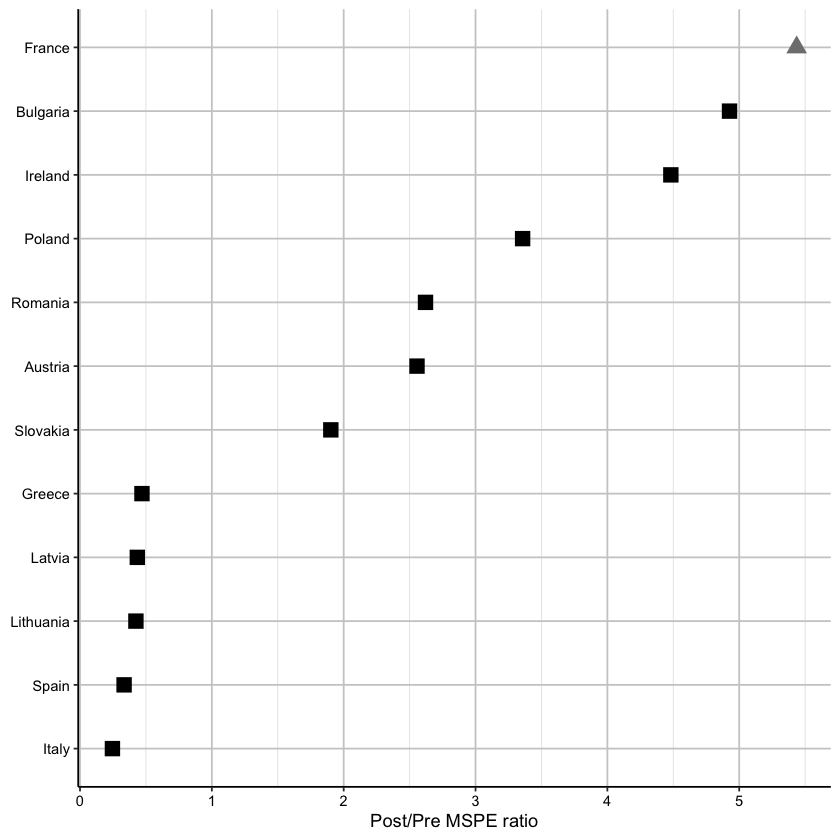

In [67]:
mspe.plot(
  placebo,
  discard.extreme = FALSE,
  mspe.limit = 100,
  plot.hist = FALSE,
  title = NULL,
  xlab = "Post/Pre MSPE ratio",
  ylab = NULL
)

In [ ]:
install.packages(("knitr"))


The downloaded binary packages are in
	/var/folders/rl/t9lj4wh550nf1_k3yl68t9br0000gn/T//RtmpqjhOrD/downloaded_packages


In [146]:
# Load the knitr package
library(knitr)

# Create a data frame with the provided data
data <- data.frame(
  Predictor = c(
    "kills_per_million", 
    "gdp", 
    "poc_percentage_population", 
    "dem_majority", 
    "dem_governor", 
    "violent_crime_per_population", 
    "homicide_per_populaiton"
  ),
  Weight = c(0.261, 0.277, 0, 0.025, 0.192, 0.13, 0.116)
)

# Create a LaTeX-style table
kable(data, format = "latex", booktabs = TRUE, caption = "Predictor weights")


\begin{table}

\caption{Predictor weights}
\centering
\begin{tabular}[t]{lr}
\toprule
Predictor & Weight\\
\midrule
kills\_per\_million & 0.261\\
gdp & 0.277\\
poc\_percentage\_population & 0.000\\
dem\_majority & 0.025\\
dem\_governor & 0.192\\
\addlinespace
violent\_crime\_per\_population & 0.130\\
homicide\_per\_populaiton & 0.116\\
\bottomrule
\end{tabular}
\end{table}

In [147]:
install.packages(("xtable"))


The downloaded binary packages are in
	/var/folders/rl/t9lj4wh550nf1_k3yl68t9br0000gn/T//RtmpqjhOrD/downloaded_packages
